# TP1 - KNN

In [3]:
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata("/Users/admin/scikit_learn_data/mldata/mnist") 

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('mnist-original')


/home/thomas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/thomas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


### Matrice de 70000 lignes et 784 colonnes.

In [3]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
print (mnist.target)

[ 0.  0.  0. ...,  9.  9.  9.]


In [5]:
len(mnist.data)
len(mnist.target)

70000

In [6]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [7]:
print (mnist.data.shape)

(70000, 784)


In [8]:
print (mnist.target.shape)

(70000,)


In [9]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
mnist.data[0][300]

253

In [11]:
mnist.data[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
mnist.data[:100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Images

In [3]:
#from sklearn import datasets
#import matplotlib.pyplot as plt
#mnist = datasets.fetch_mldata('MNIST original')

import matplotlib.pyplot as plt

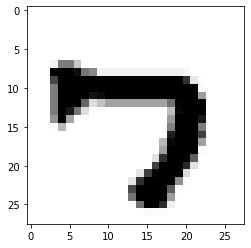

In [4]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[45678],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

In [6]:
mnist.target[45678]

7.0

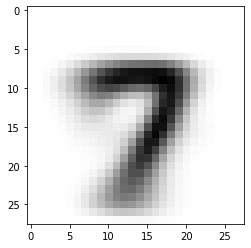

In [35]:
image = np.zeros((28,28))
compteur = 0
for i in range(0, len(mnist.data)):
    if mnist.target[i] == 7:
        compteur += 1
        for j in range(0, 28):
           for k in range(0, 28): 
                image[j][k] += images[i][j][k]
image /= compteur
plt.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

# KNN

In [4]:
from sklearn import neighbors
from sklearn import model_selection
import numpy as np

data = np.random.randint(70000, size=5000)

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.8)

In [49]:
print(xtrain.shape)
print(ytrain.shape)

(4000, 784)
(4000,)


In [50]:
xtrain[0].shape

(784,)

In [51]:
mnist.data[666].shape

(784,)

In [52]:
print(xtest.shape)
print(ytest.shape)

(1000, 784)
(1000,)


In [25]:
clf = neighbors.KNeighborsClassifier(10)

clf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
mnist.target[45678]
clf.predict(mnist.data[45678].reshape((1, -1)))

array([ 7.])

In [55]:
clf.score(xtest, ytest)

0.90400000000000003

Taux d'erreur : 1 - 0.904 = 0.096

Text(0.5, 1.0, 'Performance en fonction de k :')

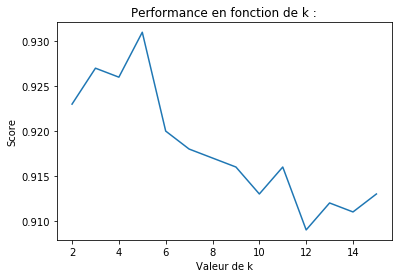

In [11]:
kResults = []

for i in range (2,16) :
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(xtrain, ytrain)
    kResults.append(clf.score(xtest, ytest))
    
plt.plot(range(2,16),kResults)
plt.xlabel("Valeur de k")
plt.ylabel("Score")
plt.title("Performance en fonction de k :")

La valeur qui semble sortir du lot est k = 5.

Cross Validation :

In [70]:
data = np.random.randint(70000, size=5000)
cross_val_scores = model_selection.cross_val_score(neighbors.KNeighborsClassifier(5), mnist.data[data], mnist.target[data], cv=10)
np.mean(cross_val_scores)

0.9286508341112448

On obtient un score moyen de 0.93.

**Calcul des performances en fontion du rapport entraînement/test :**

V1 :

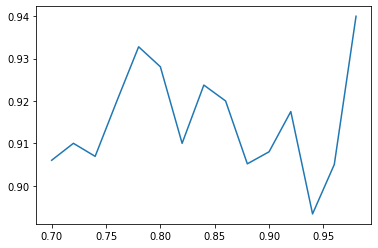

In [9]:
from pylab import *

scores = []
pourcentages = []
for i in range (0,15) :
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=0.7 + i*0.02)
    clf = neighbors.KNeighborsClassifier(4)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)
    pourcentages.append(0.7 + i*0.02)
    
plot(pourcentages,scores)
show()

V2 :

In [53]:
from pylab import *

scores = []
pourcentages = []
for i in np.arange(0.7,0.99,0.05) :
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=i)
    clf = neighbors.KNeighborsClassifier(5)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)
    


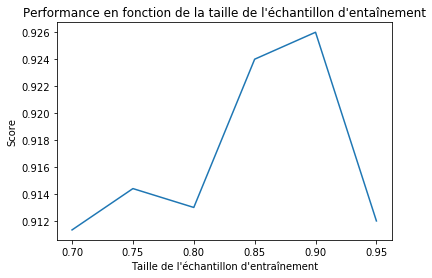

In [56]:
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.title("Performance en fonction de la taille de l'échantillon d'entaînement")
plt.plot(np.arange(0.7,0.99,0.05),scores)

On constate que les performances sont les meilleurs pour 90% d'entraînement et 10% de tests.

**Calcul des performances en fonction de la taille totale de l'échantillon (Avec un rapport train/test de 0.9) :**

In [63]:
from pylab import *
scores = []

for i in range(1,8) :
    data = np.random.randint(70000, size=i*7000)
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)
    clf = neighbors.KNeighborsClassifier(5)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)
    


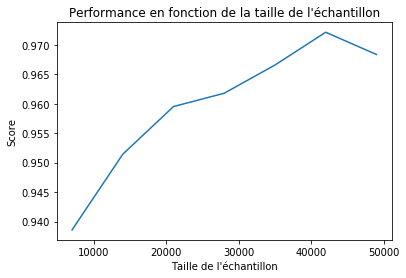

In [65]:
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score")
plt.title("Performance en fonction de la taille de l'échantillon")
plt.plot(range(7000,50000,7000),scores)

On observe un pic aux alentours de 45000.

In [5]:
%%time
from pylab import *
scores = []
data = np.random.randint(70000, size=5000)

for i in range(1,10) :
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)
    clf = neighbors.KNeighborsClassifier(5, p = i)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)

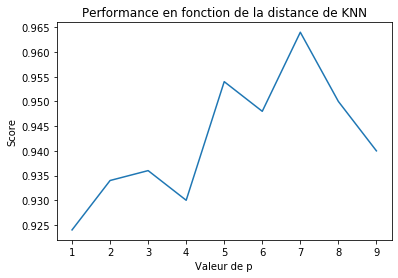

In [7]:
plt.xlabel("Valeur de p")
plt.ylabel("Score")
plt.title("Performance en fonction de la distance de KNN")
plt.plot(range(1,10),scores)

In [11]:
%%time
from time import time
from pylab import *
scores = []
data = np.random.randint(70000, size=5000)
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=0.9)

clf = neighbors.KNeighborsClassifier(5, n_jobs = -1)
t = time.time()
clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
scores.append(time.time()-t)

for i in range(1,10) :
    t = time.time()
    clf = neighbors.KNeighborsClassifier(5, n_jobs = i)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(time.time()-t)

CPU times: user 1min 1s, sys: 43.7 ms, total: 1min 1s
Wall time: 22.9 s


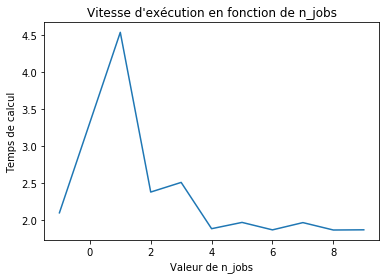

In [12]:
plt.xlabel("Valeur de n_jobs")
plt.ylabel("Temps de calcul")
plt.title("Vitesse d'exécution en fonction de n_jobs")
plt.plot([-1,1,2,3,4,5,6,7,8,9],scores)